In [4]:
import pandas as pd
col_names = ['Status of existing checking account', 'Duration in month', 
                'Credit history', 'Purpose', 'Credit amount', 
               'Savings account/bonds', 'Present employment since', 
               'Installment rate in percentage of disposable income', 
               'Personal status and sex', 'Other debtors / guarantors', 
               'Present residence since', 'Property', 'Age in years', 
               'Other installment plans', 'Housing', 
               'Number of existing credits at this bank', 'Job', 
               'Number of people being liable to provide maintenance for', 
               'Telephone', 'Foreign Worker', 'Approved']
df = pd.read_csv("german.data", sep = " ", names = col_names)
df

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign Worker,Approved
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [5]:
df.nunique() # vraca broj jedinstvenih vrednosti za svaku kolonu
# split varijabli u kategoricke ili kontinualne, uglavnom ako ih ima manje od 20, koristimo ih kao kategoricke
# ciljana varijabla - approved, kategorickih = 17, kontinualnih = 3
# Kontinualne = ['Duration in month','Credit amount', 'Age in Years']
# Kategoricke = ['Status of existing checking account', 
#                'Credit history', 'Purpose',
#               'Savings account/bonds', 'Present employment since', 
#               'Installment rate in percentage of disposable income', 
#               'Personal status and sex', 'Other debtors / guarantors', 
#               'Present residence since', 'Property', 
#               'Other installment plans', 'Housing', 
#               'Number of existing credits at this bank', 'Job', 
#               'Number of people being liable to provide maintenance for', 
#               'Telephone', 'Foreign Worker']

Status of existing checking account                           4
Duration in month                                            33
Credit history                                                5
Purpose                                                      10
Credit amount                                               921
Savings account/bonds                                         5
Present employment since                                      5
Installment rate in percentage of disposable income           4
Personal status and sex                                       4
Other debtors / guarantors                                    3
Present residence since                                       4
Property                                                      4
Age in years                                                 53
Other installment plans                                       3
Housing                                                       3
Number of existing credits at this bank 

In [6]:
#Koristiti one-way ANOVA kada se skupe informacije o jednoj kategorickoj varijabli i jednoj
#kontinualnoj varijabli

#ANOVA - Kategoricka na kontinualnu

#Pretpostavka(H0): Ne postoji povezanost izmedju datih varijabli
#Anova rezultat testiranja: Verovatnoca da je H0 tacna pretpostavka

def continuousCorrelations(data, target, continuouspredictors):
    from scipy.stats import f_oneway

    predictors = []
    
    for predictor in continuouspredictors:
        
        grouped = data.groupby(target)
        #print(type(grouped)
        predictor_gr = grouped[predictor]
        CategoryGroupLists = predictor_gr.apply(list)
        #print(CategoryGroupLists)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # Ako je ANOVA P-value manja od 0.05, odbacujemo H0 (alpha = 0.05 se uzima generalno kao default vrednost)
        if (AnovaResults[1] < 0.05):
            print(predictor, 'je u korelaciji sa ', target, '\n   P-Value:', AnovaResults[1])
            predictors.append(predictor)
    
    return(predictors)

ContinuousVariables = ['Age in years', 'Credit amount', 'Duration in month']
continuousCorrelations(df, 'Approved', ContinuousVariables)

Age in years je u korelaciji sa  Approved 
   P-Value: 0.003925339398278295
Credit amount je u korelaciji sa  Approved 
   P-Value: 8.797572373533373e-07
Duration in month je u korelaciji sa  Approved 
   P-Value: 6.488049877187189e-12


['Age in years', 'Credit amount', 'Duration in month']

In [7]:
CategoricalVariables = ['Status of existing checking account', 
                'Credit history', 'Purpose',
               'Savings account/bonds', 'Present employment since', 
               'Installment rate in percentage of disposable income', 
               'Personal status and sex', 'Other debtors / guarantors', 
               'Present residence since', 'Property', 
               'Other installment plans', 'Housing', 
               'Number of existing credits at this bank', 'Job', 
               'Number of people being liable to provide maintenance for', 
               'Telephone', 'Foreign Worker']

#Chi-Square test se radi za korelaciju izmedju dve kategoricke varijable

#Pretpostavka(H0): Ne postoji povezanost izmedju datih varijabli
#Anova rezultat testiranja: Verovatnoca da je H0 tacna pretpostavka

def categoricalCorrelations(data, target, categoricalpredictors):
    from scipy.stats import chi2_contingency
    
    predictors = []

    for predictor in CategoricalVariables:
        res1 = pd.crosstab(data[target], data[predictor])
        Chi_res = chi2_contingency(res1)
        
        # Ako je ANOVA P-value manja od 0.05, odbacujemo H0 (isto kao ANOVA)
        if (Chi_res[1] < 0.05):
            print(predictor, 'je u korelaciji sa ', target, '\n    P-Value:', Chi_res[1])
            predictors.append(predictor)
            
    return(predictors)

categoricalCorrelations(df, 'Approved', CategoricalVariables)

Status of existing checking account je u korelaciji sa  Approved 
    P-Value: 1.2189020722893755e-26
Credit history je u korelaciji sa  Approved 
    P-Value: 1.279187295675101e-12
Purpose je u korelaciji sa  Approved 
    P-Value: 0.00011574910079691586
Savings account/bonds je u korelaciji sa  Approved 
    P-Value: 2.7612142385682596e-07
Present employment since je u korelaciji sa  Approved 
    P-Value: 0.0010454523491402541
Personal status and sex je u korelaciji sa  Approved 
    P-Value: 0.02223800546926877
Other debtors / guarantors je u korelaciji sa  Approved 
    P-Value: 0.036055954027247226
Property je u korelaciji sa  Approved 
    P-Value: 2.8584415733250017e-05
Other installment plans je u korelaciji sa  Approved 
    P-Value: 0.0016293178186473534
Housing je u korelaciji sa  Approved 
    P-Value: 0.00011167465374597686
Foreign Worker je u korelaciji sa  Approved 
    P-Value: 0.015830754902852885


['Status of existing checking account',
 'Credit history',
 'Purpose',
 'Savings account/bonds',
 'Present employment since',
 'Personal status and sex',
 'Other debtors / guarantors',
 'Property',
 'Other installment plans',
 'Housing',
 'Foreign Worker']

In [9]:
#Pravimo dataframe koji sadrzi samo varijable koje su u korelaciji sa "Approved"

usables = ['Status of existing checking account',
 'Credit history',
 'Purpose',
 'Savings account/bonds',
 'Present employment since',
 'Personal status and sex',
 'Other debtors / guarantors',
 'Property',
 'Other installment plans',
 'Housing',
 'Foreign Worker',
 'Age in years', 
 'Credit amount', 
 'Duration in month']

df_usables = df[usables]
df_usables

,Status of existing checking account,Credit history,Purpose,Savings account/bonds,Present employment since,Personal status and sex,Other debtors / guarantors,Property,Other installment plans,Housing,Foreign Worker,Age in years,Credit amount,Duration in month
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201,67,1169,6
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201,22,5951,48
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201,49,2096,12
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201,45,7882,42
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201,53,4870,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,A32,A42,A61,A74,A92,A101,A121,A143,A152,A201,31,1736,12
996,A11,A32,A41,A61,A73,A91,A101,A122,A143,A152,A201,40,3857,30
997,A14,A32,A43,A61,A75,A93,A101,A123,A143,A152,A201,38,804,12
998,A11,A32,A43,A61,A73,A93,A101,A124,A143,A153,A201,23,1845,45


In [6]:
#Mapiranja
#Nalazenje nominalnih, ordinalnih i intervalnih varijabli

#Nominalne varijable (kategoricke) su varijable koje nisu u specificnom redosledu
#Ovaj tip podataka ne moze da se koristi u funkcijama kao sto su mean ili sum,
#vec samo podelom na kategorije i koriscenjem frekvencije ili procentaze
#da bismo odredili broj pojave kategorije u podacima

#Ordinalne varijable imaju uocljiv redosled, ali intervali izmedju njih nisu jednaki
#Npr. imamo razlike izmedju spreme; "osnovna" i "gimnazijska", i "gimnazijska" i "fakultetska"
#Takodje, kao sa nominalima, frekvencije i procentaze su generalno bolje, ali ponekad
#se mogu koristiti mean funkcije
#Ovde ih necu koristiti jer nisam siguran da li su kompatibilne sa ovim podacima

#Intervalne varijable su tzv. kvantitativni podaci, ovi podaci su kompletni na pocetku,
#tako da nije potrebno bilo kakvo mapiranje nad njima

In [10]:
#Ordinalna varijabla
df_usables['Present employment since'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace = True)

#Binarna Nominalna varijabla (bool, da/ne), nju mozemo ovako, dok cemo ostale sa get_dummies
df_usables['Foreign Worker'].replace({'A201':1, 'A202':0}, inplace = True)
#Podsetnik, inplace updatuje dataframe, ne pravi novi

# Ostale varijable mozemo da mapiramo sa get_dummies
df_usables_mapped = pd.get_dummies(df_usables)
df_usables_mapped['Approved'] = df['Approved']

df_usables_mapped

C:\Users\Prime Software\AppData\Local\Temp\ipykernel_5636\1327232738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usables['Present employment since'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace = True)
C:\Users\Prime Software\AppData\Local\Temp\ipykernel_5636\1327232738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usables['Foreign Worker'].replace({'A201':1, 'A202':0}, inplace = True)


,Present employment since,Foreign Worker,Age in years,Credit amount,Duration in month,Status of existing checking account_A11,Status of existing checking account_A12,Status of existing checking account_A13,Status of existing checking account_A14,Credit history_A30,...,Property_A122,Property_A123,Property_A124,Other installment plans_A141,Other installment plans_A142,Other installment plans_A143,Housing_A151,Housing_A152,Housing_A153,Approved
0,5,1,67,1169,6,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,3,1,22,5951,48,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,2
2,4,1,49,2096,12,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
3,4,1,45,7882,42,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
4,3,1,53,4870,24,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,1,31,1736,12,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
996,3,1,40,3857,30,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
997,5,1,38,804,12,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
998,3,1,23,1845,45,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,2


In [8]:
df_usables_mapped.columns

Index(['Present employment since', 'Foreign Worker', 'Age in years',
       'Credit amount', 'Duration in month',
       'Status of existing checking account_A11',
       'Status of existing checking account_A12',
       'Status of existing checking account_A13',
       'Status of existing checking account_A14', 'Credit history_A30',
       'Credit history_A31', 'Credit history_A32', 'Credit history_A33',
       'Credit history_A34', 'Purpose_A40', 'Purpose_A41', 'Purpose_A410',
       'Purpose_A42', 'Purpose_A43', 'Purpose_A44', 'Purpose_A45',
       'Purpose_A46', 'Purpose_A48', 'Purpose_A49',
       'Savings account/bonds_A61', 'Savings account/bonds_A62',
       'Savings account/bonds_A63', 'Savings account/bonds_A64',
       'Savings account/bonds_A65', 'Personal status and sex_A91',
       'Personal status and sex_A92', 'Personal status and sex_A93',
       'Personal status and sex_A94', 'Other debtors / guarantors_A101',
       'Other debtors / guarantors_A102', 'Other debtors /

In [11]:
#Podela za treniranje

TargetVariable='Approved'
Predictors=['Present employment since', 'Foreign Worker', 'Age in years',
       'Credit amount', 'Duration in month',
       'Status of existing checking account_A11',
       'Status of existing checking account_A12',
       'Status of existing checking account_A13',
       'Status of existing checking account_A14', 'Credit history_A30',
       'Credit history_A31', 'Credit history_A32', 'Credit history_A33',
       'Credit history_A34', 'Purpose_A40', 'Purpose_A41', 'Purpose_A410',
       'Purpose_A42', 'Purpose_A43', 'Purpose_A44', 'Purpose_A45',
       'Purpose_A46', 'Purpose_A48', 'Purpose_A49',
       'Savings account/bonds_A61', 'Savings account/bonds_A62',
       'Savings account/bonds_A63', 'Savings account/bonds_A64',
       'Savings account/bonds_A65', 'Personal status and sex_A91',
       'Personal status and sex_A92', 'Personal status and sex_A93',
       'Personal status and sex_A94', 'Other debtors / guarantors_A101',
       'Other debtors / guarantors_A102', 'Other debtors / guarantors_A103',
       'Property_A121', 'Property_A122', 'Property_A123', 'Property_A124',
       'Other installment plans_A141', 'Other installment plans_A142',
       'Other installment plans_A143', 'Housing_A151', 'Housing_A152',
       'Housing_A153']

X = df_usables_mapped[Predictors].values
y = df_usables_mapped[TargetVariable].values

# Split u training i test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 46)
(700,)
(300, 46)
(300,)


In [79]:
import numpy
from imblearn.datasets import make_imbalance
unique1, counts1 = numpy.unique(y_train, return_counts=True)
print(unique1,counts1)
unique2, counts2 = numpy.unique(y_test, return_counts=True)
print(unique2,counts2)

train_perc_pos = 482/700
train_perc_neg = 218/700
test_perc_pos = 218/300
test_perc_neg = 82/300

print("Procentaza approved = 1 u train i test setu: " + str(train_perc_pos),str(test_perc_pos))
print("Procentaza approved = 2 u train i test setu: " + str(train_perc_neg),str(test_perc_neg))

X_train_1, y_train_1 = make_imbalance(X, y, 
                                  sampling_strategy={1: 50, 2: 50},random_state=14)

unique3, counts3 = numpy.unique(y_train_1, return_counts=True)
print(unique3,counts3)
unique4, counts4 = numpy.unique(y_test, return_counts=True)
print(unique4,counts4)

[1 2] [482 218]
[1 2] [218  82]
Procentaza approved = 1 u train i test setu: 0.6885714285714286 0.7266666666666667
Procentaza approved = 2 u train i test setu: 0.31142857142857144 0.2733333333333333
[1 2] [50 50]
[1 2] [218  82]


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#onehot - nepotreban

              precision    recall  f1-score   support

           1       0.80      0.92      0.86       218
           2       0.65      0.39      0.49        82

    accuracy                           0.78       300
   macro avg       0.73      0.66      0.67       300
weighted avg       0.76      0.78      0.76       300

[[201  17]
 [ 50  32]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.72266667 0.71776316 0.7547619  0.70413016 0.77781287 0.82631579
 0.64303534 0.78407524 0.78407524 0.76      ]

Final Average Accuracy of the model: 0.75


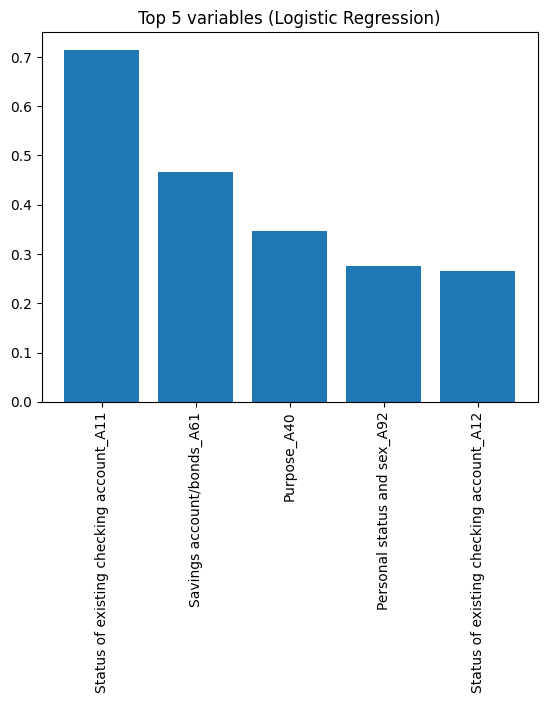

In [42]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
Fit = clf.fit(X_train, y_train)

grid_vals = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1], 'random_state': [42,1337,1,35]}
grid_lr = GridSearchCV(estimator=clf, param_grid=grid_vals, scoring='accuracy', 
                       refit=True, return_train_score=True) 
grid_lr.fit(X_train, y_train)
prediction = grid_lr.best_estimator_.predict(X_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score = metrics.f1_score(y_test, prediction, average = 'weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
LOGF1 = round(F1_Score,2)

Accuracy_Values = cross_val_score(LOG, X , y, cv = 10, scoring = 'f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
LOGacc = round(Accuracy_Values.mean(),2)

importances = pd.DataFrame(data = 
{
    'Attribute': Predictors,
    'Importance': clf.coef_[0]
})
importances = importances.sort_values(by = 'Importance', ascending = False)

plt.bar(x = importances['Attribute'][:5], height = importances['Importance'][:5])
plt.title('Top 5 variables (Logistic Regression)')
plt.xticks(rotation = 'vertical')
plt.show()

              precision    recall  f1-score   support

           1       0.81      0.86      0.83       218
           2       0.56      0.48      0.51        82

    accuracy                           0.75       300
   macro avg       0.69      0.67      0.67       300
weighted avg       0.74      0.75      0.75       300

[[187  31]
 [ 43  39]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.68738128 0.68801189 0.71388889 0.73104474 0.65160986 0.71776316
 0.68801189 0.71714424 0.71225296 0.70952831]

Final Average Accuracy of the model: 0.7


<AxesSubplot: title={'center': 'Top 5 variables (Decision tree)'}>

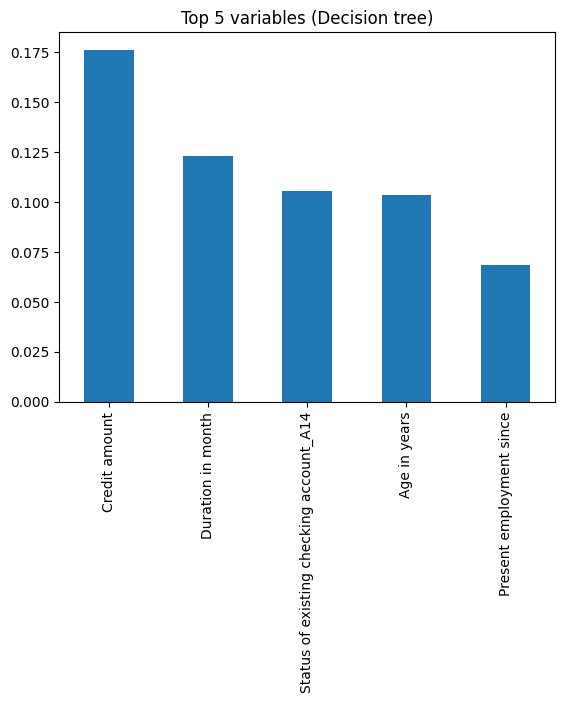

In [36]:
from sklearn.model_selection import GridSearchCV
clf = tree.DecisionTreeClassifier()
Fit = clf.fit(X_train, y_train)

grid_vals = {'criterion': ['gini','log_loss'], 'max_depth': [4,5,6,7,8,9,10,20]}
grid_lr = GridSearchCV(estimator=clf, param_grid=grid_vals, scoring='accuracy', 
                       refit=True, return_train_score=True) 
DTree = grid_lr.fit(X_train, y_train)
prediction = grid_lr.best_estimator_.predict(X_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
DTreeF1 = round(F1_Score,2)

Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
DTreeacc = round(Accuracy_Values.mean(),2)

feature_importances = pd.Series(Fit.feature_importances_, index=Predictors)
feature_importances.nlargest(5).plot(kind='bar', title='Top 5 variables (Decision tree)')

              precision    recall  f1-score   support

           1       0.79      0.91      0.85       218
           2       0.61      0.37      0.46        82

    accuracy                           0.76       300
   macro avg       0.70      0.64      0.65       300
weighted avg       0.74      0.76      0.74       300

[[199  19]
 [ 52  30]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.80460526 0.69806452 0.76028751 0.76987902 0.73044946 0.75128205
 0.71776316 0.81371158 0.69806452 0.77229833]

Final Average Accuracy of the model: 0.75


<AxesSubplot: title={'center': 'Top 5 variables (Random Forest)'}>

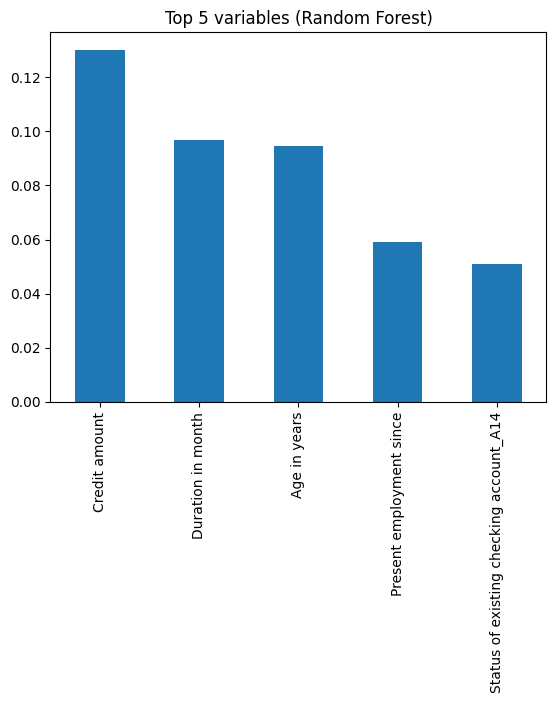

In [41]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier()
Fit = model.fit(X_train, y_train)
param_vals = {'max_depth': [4, 5, 6, 7, 8, 9, 10, 20], 'n_estimators': [100, 150, 200, 250, 300, 350, 400]}
random_rf = RandomizedSearchCV(estimator=model, param_distributions=param_vals,
                              n_iter=10, scoring='accuracy',
                              refit=True, n_jobs=-1)

RF = random_rf.fit(X_train, y_train)
prediction = random_rf.best_estimator_.predict(X_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
RFF1 = round(F1_Score,2)

Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
RFacc = round(Accuracy_Values.mean(),2)

feature_importances = pd.Series(Fit.feature_importances_, index=Predictors)
feature_importances.nlargest(5).plot(kind='bar', title='Top 5 variables (Random Forest)')

In [44]:
from sklearn import svm

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridder = grid.fit(X_train, y_train)

prediction=gridder.predict(X_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
SVMF1 = round(F1_Score,2)

Accuracy_Values=cross_val_score(gridder, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
SVMacc = round(Accuracy_Values.mean(),2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.693 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.636 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.614 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.621 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.679 total time=   0.0s
[CV 5/5] END ....C=1000, gam

[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.672 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.661 total time=   0.0s
[CV 2/5] END .....C=100, gam

[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.644 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ......C=10, gam

[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.678 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.672 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.678 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.689 total time=   0.0s
[CV 5/5] END .......C=1, gam

[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ....C=0.1, gamm

[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.661 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.644 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.644 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.583 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.644 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.583 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.628 total time=   0.0s
[CV 5/5] END ...C=1000, gamm

[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.672 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.644 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.661 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.583 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.611 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.594 total time=   0.0s
[CV 1/5] END ...C=100, gamma

[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.672 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.689 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.644 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.656 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.644 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.639 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.650 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.661 total time=   0.0s
[CV 2/5] END ....C=10, gamma

[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.689 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.661 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.672 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.672 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.689 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.683 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.689 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END .....C=1, gamma

[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END ..........C=1, 

[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.661 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.606 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.656 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.606 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.672 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.661 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.694 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.639 total time=   0.0s
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf

[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.594 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.711 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.672 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.683 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.694 total time=   0.0s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END .....C=1000, ga

[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.656 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.639 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END .....C=100, gam

In [46]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
DTC = DecisionTreeClassifier()
RDF = RandomForestClassifier()

grid_vals = {'base_estimator': [DTC,RDF], 'n_estimators': [100,150,200,250,300,350,400], 
            'learning_rate': [0.01,0.02,0.0375,0.05,0.1,0.2]}
grid_lr = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', 
                       refit=True, return_train_score=True) 
gridder=grid_lr.fit(X_train,y_train)
prediction=gridder.predict(X_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
ADAF1 = round(F1_Score,2)

Accuracy_Values=cross_val_score(gridder, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
ADAacc = round(Accuracy_Values.mean(),2)

              precision    recall  f1-score   support

           1       0.80      0.91      0.85       218
           2       0.62      0.38      0.47        82

    accuracy                           0.77       300
   macro avg       0.71      0.65      0.66       300
weighted avg       0.75      0.77      0.75       300

[[199  19]
 [ 51  31]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.79002079 0.71776316 0.744      0.73947368 0.71433083 0.7427957
 0.71776316 0.77407758 0.72266667 0.75159817]

Final Average Accuracy of the model: 0.74


In [48]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

NBGauss=clf.fit(X_train,y_train)
prediction=NBGauss.predict(X_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
NBGaussF1 = round(F1_Score,2)

Accuracy_Values=cross_val_score(NBGauss, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
NBGaussacc = round(Accuracy_Values.mean(),2)

              precision    recall  f1-score   support

           1       0.82      0.79      0.81       218
           2       0.49      0.54      0.51        82

    accuracy                           0.72       300
   macro avg       0.66      0.67      0.66       300
weighted avg       0.73      0.72      0.73       300

[[173  45]
 [ 38  44]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.72923077 0.71751767 0.72       0.71578348 0.74230949 0.77295794
 0.65405405 0.73347237 0.75321515 0.76553596]

Final Average Accuracy of the model: 0.73


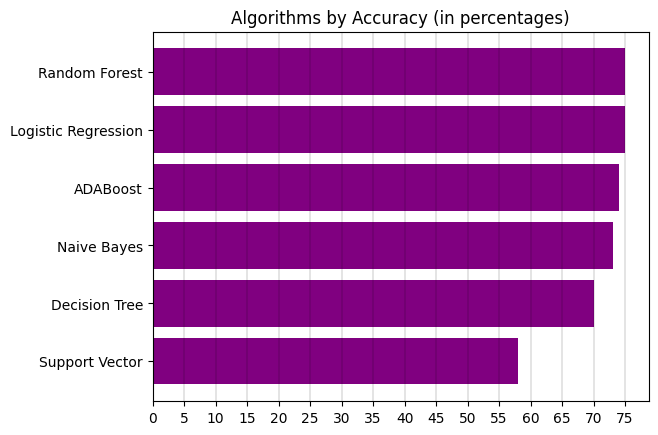

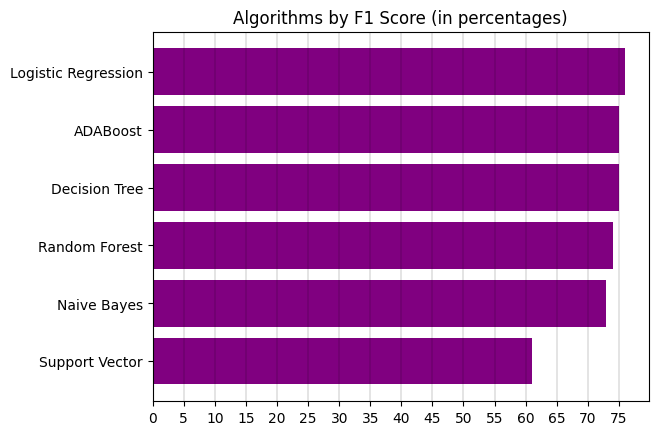

Final average accuracy of models:  0.7083333333333334
Final average F1 score of models:  0.7233333333333333


In [49]:
finaltestaccdf = pd.DataFrame(
    dict(
        finaltestnames = ['Logistic Regression','Support Vector', 'Naive Bayes',
                  'Decision Tree','Random Forest', 'ADABoost'],
        finaltestacc = [LOGacc*100,SVMacc*100,NBGaussacc*100,DTreeacc*100,RFacc*100,ADAacc*100]
    )
)

finaltestf1df = pd.DataFrame(
    dict(
        finaltestnames = ['Logistic Regression','Support Vector', 'Naive Bayes',
                  'Decision Tree','Random Forest', 'ADABoost'],
        finaltestf1 = [LOGF1*100,SVMF1*100,NBGaussF1*100,DTreeF1*100,RFF1*100,ADAF1*100]
    )
)

plt.title('Algorithms by Accuracy (in percentages)')
plt.grid(axis='x', linewidth=0.15, color='black')
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80])
finaltestaccdf_sorted = finaltestaccdf.sort_values('finaltestacc')
plt.barh('finaltestnames', 'finaltestacc', data=finaltestaccdf_sorted, color='purple')
plt.show()

plt.title('Algorithms by F1 Score (in percentages)')
plt.grid(axis='x', linewidth=0.15, color='black')
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80])
finaltestf1df_sorted = finaltestf1df.sort_values('finaltestf1')
plt.barh('finaltestnames', 'finaltestf1', data=finaltestf1df_sorted, color='purple')
plt.show()

avgAcc = (LOGacc + SVMacc + NBGaussacc + DTreeacc + RFacc + ADAacc)/6
avgF1 = (LOGF1 + SVMF1 + NBGaussF1 + DTreeF1 + RFF1 + ADAF1)/6
print('Final average accuracy of models: ', avgAcc)
print('Final average F1 score of models: ', avgF1)

In [1]:
#======================================== NO BALANCE OVER ========================================#

In [86]:
from imblearn.over_sampling import SMOTE
#from sklearn.model_selection import RepeatedStratifiedKFold

#SMOTE (Synthetic Minority Oversampling Technique) 
#is an oversampling method of balancing class distribution in the dataset.
#the algorithm selects the random example from the minority class and selects a random neighbor 
#using K Nearest Neighbors. The synthetic example is created between two examples in the feature space. 

#There is a drawback to using SMOTE, as it does not consider the majority class while 
#creating synthetic examples. This can cause issues where there is a strong overlap between the classes.

over = SMOTE()

X, y = over.fit_resample(X, y)

decisionTreeModel = DecisionTreeClassifier()
randomForestModel = RandomForestClassifier()
logisticRegressionModel = LogisticRegression()

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
resultDecisionTree = cross_val_score(decisionTreeModel, X, y, scoring="roc_auc", cv=10, n_jobs=-1)
print("Decision tree accuracy: %.3f" % np.mean(resultDecisionTree))
resultRandomForest = cross_val_score(randomForestModel, X, y, scoring="roc_auc", cv=10, n_jobs=-1)
print("Random forest accuracy: %.3f" % np.mean(resultRandomForest))
resultLogRes = cross_val_score(logisticRegressionModel, X, y, scoring="roc_auc", cv=10, n_jobs=-1)
print("Logistic regression: %.3f" % np.mean(resultLogRes))


Decision tree accuracy: 0.774
Random forest accuracy: 0.913
Logistic regression: 0.882


In [87]:
model = AdaBoostClassifier()
DTC = DecisionTreeClassifier()
RDF = RandomForestClassifier()

grid_vals = {'base_estimator': [DTC,RDF], 'n_estimators': [100,150,200,250,300,350,400], 
            'learning_rate': [0.01,0.02,0.0375,0.05,0.1,0.2]}
grid_lr = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', 
                       refit=True, return_train_score=True) 
gridder=grid_lr.fit(X_train,y_train)
prediction=gridder.predict(X_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
ADAF1 = round(F1_Score,2)

Accuracy_Values=cross_val_score(gridder, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
ADAacc = round(Accuracy_Values.mean(),2)

              precision    recall  f1-score   support

           1       0.80      0.89      0.84       218
           2       0.58      0.39      0.47        82

    accuracy                           0.76       300
   macro avg       0.69      0.64      0.65       300
weighted avg       0.74      0.76      0.74       300

[[195  23]
 [ 50  32]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.68274045 0.68433748 0.70563499 0.71620147 0.84285714 0.94993614
 0.91365132 0.94266994 0.93555317 0.91365132]

Final Average Accuracy of the model: 0.83


In [88]:
clf = LogisticRegression()
Fit = clf.fit(X_train, y_train)

grid_vals = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1], 'random_state': [42,1337,1,35]}
grid_lr = GridSearchCV(estimator=clf, param_grid=grid_vals, scoring='accuracy', 
                       refit=True, return_train_score=True) 
grid_lr.fit(X_train, y_train)
prediction = grid_lr.best_estimator_.predict(X_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score = metrics.f1_score(y_test, prediction, average = 'weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
LOGF1 = round(F1_Score,2)

Accuracy_Values = cross_val_score(LOG, X , y, cv = 10, scoring = 'f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
LOGacc = round(Accuracy_Values.mean(),2)

              precision    recall  f1-score   support

           1       0.80      0.92      0.86       218
           2       0.65      0.39      0.49        82

    accuracy                           0.78       300
   macro avg       0.73      0.66      0.67       300
weighted avg       0.76      0.78      0.76       300

[[201  17]
 [ 50  32]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.67775685 0.60445653 0.65497352 0.72497932 0.82853644 0.87856523
 0.82683983 0.8989899  0.9209405  0.90656605]

Final Average Accuracy of the model: 0.79


In [89]:
clf = tree.DecisionTreeClassifier()
Fit = clf.fit(X_train, y_train)

grid_vals = {'criterion': ['gini','log_loss'], 'max_depth': [4,5,6,7,8,9,10,20]}
grid_lr = GridSearchCV(estimator=clf, param_grid=grid_vals, scoring='accuracy', 
                       refit=True, return_train_score=True) 
DTree = grid_lr.fit(X_train, y_train)
prediction = grid_lr.best_estimator_.predict(X_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
DTreeF1 = round(F1_Score,2)

Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
DTreeacc = round(Accuracy_Values.mean(),2)

              precision    recall  f1-score   support

           1       0.81      0.87      0.84       218
           2       0.57      0.46      0.51        82

    accuracy                           0.76       300
   macro avg       0.69      0.67      0.67       300
weighted avg       0.74      0.76      0.75       300

[[189  29]
 [ 44  38]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.69158256 0.5926701  0.64029154 0.67254015 0.77801647 0.89219159
 0.83325566 0.85474165 0.89219159 0.85474165]

Final Average Accuracy of the model: 0.77


In [90]:
model = RandomForestClassifier()
Fit = model.fit(X_train, y_train)
param_vals = {'max_depth': [4, 5, 6, 7, 8, 9, 10, 20], 'n_estimators': [100, 150, 200, 250, 300, 350, 400]}
random_rf = RandomizedSearchCV(estimator=model, param_distributions=param_vals,
                              n_iter=10, scoring='accuracy',
                              refit=True, n_jobs=-1)

RF = random_rf.fit(X_train, y_train)
prediction = random_rf.best_estimator_.predict(X_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
RFF1 = round(F1_Score,2)

Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
RFacc = round(Accuracy_Values.mean(),2)

              precision    recall  f1-score   support

           1       0.80      0.91      0.85       218
           2       0.61      0.38      0.47        82

    accuracy                           0.76       300
   macro avg       0.70      0.64      0.66       300
weighted avg       0.74      0.76      0.74       300

[[198  20]
 [ 51  31]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.69091674 0.68253968 0.69091674 0.7004019  0.8357059  0.94275199
 0.88455988 0.8989899  0.92110252 0.8471854 ]

Final Average Accuracy of the model: 0.81


In [91]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridder = grid.fit(X_train, y_train)

prediction=gridder.predict(X_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
SVMF1 = round(F1_Score,2)

Accuracy_Values=cross_val_score(gridder, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
SVMacc = round(Accuracy_Values.mean(),2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.693 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.693 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.636 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.614 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.621 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.679 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.686 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.621 total time=   0.0s
[CV 2/5] END ...C=1000, gamm

[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.528 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.552 total time=   0.1s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.575 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.710 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.0s
[CV 3/5] END .....C=100, gam

[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.528 total time=   0.1s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.540 total time=   0.1s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.552 total time=   0.1s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.575 total time=   0.1s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.655 total time=   0.1s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.1s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.710 total time=   0.1s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.702 total time=   0.1s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.1s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.702 total time=   0.1s
[CV 4/5] END ......C=10, gam

[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.540 total time=   0.1s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.544 total time=   0.1s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.567 total time=   0.1s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.651 total time=   0.1s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.671 total time=   0.1s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.1s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.671 total time=   0.1s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.1s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.710 total time=   0.1s
[CV 5/5] END .......C=1, gam

[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.524 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.520 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.567 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.540 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.528 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.651 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.619 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.698 total time=   0.1s
[CV 1/5] END ....C=0.1, gamm

[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.655 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.710 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.698 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.722 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.742 total time=   0.1s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.710 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.738 total time=   0.1s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.694 total time=   0.1s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.718 total time=   0.1s
[CV 3/5] END ...C=1000, gamm

[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.1s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.1s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.1s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.698 total time=   0.1s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.706 total time=   0.1s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.1s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.1s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.730 total time=   0.1s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.742 total time=   0.1s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.687 total time=   0.1s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.687 total time=   0.1s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.730 total time=   0.0s
[CV 4/5] END ....C=100, gamm

[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.1s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.1s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.1s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.679 total time=   0.1s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.1s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.738 total time=   0.1s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.742 total time=   0.1s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.671 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.663 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.698 total time=   0.1s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.675 total time=   0.1s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.738 total time=   0.1s
[CV 1/5] END ....C=10, gamma

[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.647 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.659 total time=   0.1s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.706 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.710 total time=   0.1s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.1s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.611 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.583 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.655 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.639 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.647 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.591 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.563 total time=   0.1s
[CV 3/5] END .....C=1, gamma

[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.579 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.544 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.647 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.694 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.611 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.571 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.635 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.726 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.631 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.595 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.544 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.595 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma

[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.726 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.754 total time=   0.1s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.694 total time=   0.1s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.663 total time=   0.1s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.742 total time=   0.1s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.770 total time=   0.1s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.758 total time=   0.1s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.702 total time=   0.2s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.687 total time=   0.2s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.774 total time=   0.2s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.845 total time=   0.3s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.766 total time=   0.3s
Fitting 5 folds for each of 

[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.679 total time=   0.1s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.687 total time=   0.1s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.746 total time=   0.1s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.742 total time=   0.1s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.750 total time=   0.1s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.651 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.647 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.698 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.778 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.734 total time=   0.0s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.508 total time=   0.1s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.516 total time=   0.1s
[CV 3/5] END .......C=1000, 

[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.730 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.655 total time=   0.1s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.683 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.599 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.675 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.710 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.655 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.516 total time=   0.1s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.520 total time=   0.1s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.528 total time=   0.1s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.552 total time=   0.1s
[CV 5/5] END ........C=100, 

In [92]:
clf = GaussianNB()

NBGauss=clf.fit(X_train,y_train)
prediction=NBGauss.predict(X_test)

print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
NBGaussF1 = round(F1_Score,2)

Accuracy_Values=cross_val_score(NBGauss, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
NBGaussacc = round(Accuracy_Values.mean(),2)

              precision    recall  f1-score   support

           1       0.82      0.79      0.81       218
           2       0.49      0.54      0.51        82

    accuracy                           0.72       300
   macro avg       0.66      0.67      0.66       300
weighted avg       0.73      0.72      0.73       300

[[173  45]
 [ 38  44]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.64846202 0.57875078 0.69375    0.76330755 0.7993448  0.90656605
 0.83263163 0.87751531 0.88455988 0.88455988]

Final Average Accuracy of the model: 0.79


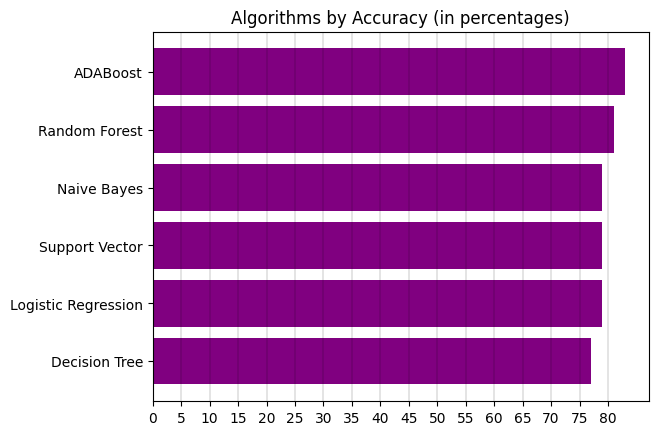

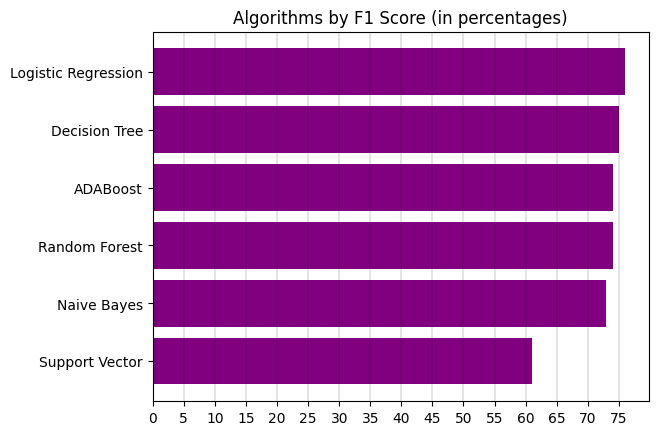

Final average accuracy of models (after smote oversampling): 0.7966666666666667
Final average F1 score of models (after smote oversampling): 0.7216666666666667


In [93]:
finaltestaccdf = pd.DataFrame(
    dict(
        finaltestnames = ['Logistic Regression','Support Vector', 'Naive Bayes',
                  'Decision Tree','Random Forest', 'ADABoost'],
        finaltestacc = [LOGacc*100,SVMacc*100,NBGaussacc*100,DTreeacc*100,RFacc*100,ADAacc*100]
    )
)

finaltestf1df = pd.DataFrame(
    dict(
        finaltestnames = ['Logistic Regression','Support Vector', 'Naive Bayes',
                  'Decision Tree','Random Forest', 'ADABoost'],
        finaltestf1 = [LOGF1*100,SVMF1*100,NBGaussF1*100,DTreeF1*100,RFF1*100,ADAF1*100]
    )
)

plt.title('Algorithms by Accuracy (in percentages)')
plt.grid(axis='x', linewidth=0.15, color='black')
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80])
finaltestaccdf_sorted = finaltestaccdf.sort_values('finaltestacc')
plt.barh('finaltestnames', 'finaltestacc', data=finaltestaccdf_sorted, color='purple')
plt.show()

plt.title('Algorithms by F1 Score (in percentages)')
plt.grid(axis='x', linewidth=0.15, color='black')
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80])
finaltestf1df_sorted = finaltestf1df.sort_values('finaltestf1')
plt.barh('finaltestnames', 'finaltestf1', data=finaltestf1df_sorted, color='purple')
plt.show()

avgAcc = (LOGacc + SVMacc + NBGaussacc + DTreeacc + RFacc + ADAacc)/6
avgF1 = (LOGF1 + SVMF1 + NBGaussF1 + DTreeF1 + RFF1 + ADAF1)/6
print('Final average accuracy of models (after smote oversampling):', avgAcc)
print('Final average F1 score of models (after smote oversampling):', avgF1)

In [118]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

X = df_usables_mapped
y = df_usables_mapped[TargetVariable].values

# Split u training i test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)

X_train = h2o.H2OFrame(X_train)
X_test = h2o.H2OFrame(X_test)

x = X_train.columns
y = "Approved"

X_train["Approved"] = X_train["Approved"].asfactor()
X_test["Approved"] = X_test["Approved"].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=X_train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,48 mins 09 secs
H2O_cluster_timezone:,Europe/Belgrade
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_Prime_Software_di6uip
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.922 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
11:15:47.956: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20230111_111547,0.805674,0.491707,0.614963,0.256586,0.401262,0.161011
StackedEnsemble_AllModels_1_AutoML_1_20230111_111547,0.800406,0.495416,0.608662,0.263514,0.40394,0.163168
GBM_2_AutoML_1_20230111_111547,0.799183,0.493976,0.624724,0.267387,0.404145,0.163333
GBM_3_AutoML_1_20230111_111547,0.792679,0.499529,0.611619,0.274554,0.407779,0.166284
GBM_5_AutoML_1_20230111_111547,0.792503,0.50826,0.578391,0.272193,0.410702,0.168676
GBM_grid_1_AutoML_1_20230111_111547_model_5,0.786298,0.505114,0.612045,0.274601,0.40902,0.167297
GBM_4_AutoML_1_20230111_111547,0.786136,0.507439,0.58856,0.281539,0.411364,0.169221
GBM_grid_1_AutoML_1_20230111_111547_model_2,0.786088,0.508583,0.582747,0.279731,0.412007,0.16975
GBM_grid_1_AutoML_1_20230111_111547_model_4,0.784423,0.510071,0.57039,0.262743,0.412733,0.170349
GBM_grid_1_AutoML_1_20230111_111547_model_3,0.783661,0.508782,0.589146,0.269795,0.41223,0.169934


In [127]:
preds = aml.leader.predict(X_test)
preds

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p1,p2
1,0.92468,0.0753204
2,0.389924,0.610076
2,0.601746,0.398254
2,0.451543,0.548457
2,0.374726,0.625274
1,0.97589,0.0241103
1,0.983123,0.0168771
1,0.928742,0.0712584
1,0.768612,0.231388
1,0.982214,0.0177856


In [126]:
m = aml.get_best_model()
print(m)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20230111_111547

No summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.02748844483908393
RMSE: 0.1657963957361074
LogLoss: 0.13787883336895554
AUC: 0.9989959648254596
AUCPR: 0.9979949143856732
Gini: 0.9979919296509192
Null degrees of freedom: 699
Residual degrees of freedom: 696
Null deviance: 868.33449573995
Residual deviance: 193.03036671653774
AIC: 201.03036671653774

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4165317861021948
       1    2    Error    Rate
-----  ---  ---  -------  -----------
1      479  3    0.0062   (3.0/482.0)
2      2    216  0.0092   (2.0/218.0)
Total  481  219  0.0071   (5.0/700.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                      

In [129]:
h2o.shutdown()

C:\Users\Prime Software\AppData\Local\Temp\ipykernel_5636\2900054706.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


H2O session _sid_ad17 closed.
